In [2]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, accuracy_score, precision_score

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
df = pd.DataFrame( iris['data'] )
df.columns = iris['feature_names']
df['species'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


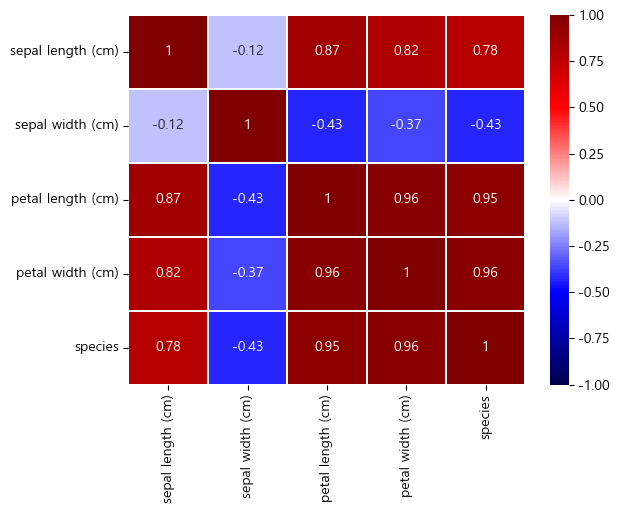

In [8]:
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True,
           linewidths=0.2, cmap='seismic' )
plt.show()

In [9]:
x_data = df.iloc[:,:-1].values
y_onehot = pd.get_dummies(df['species'])
y_data = y_onehot.values

In [10]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )

In [11]:
x = torch.FloatTensor(x_dataN)
y = torch.FloatTensor(y_data)

In [13]:
model = Sequential()
model.add_module('nn1', Linear(4,3)) # (특성갯수, 라벨 갯수) w: 특성갯수 x 라벨 갯수, b: 라벨 갯수
model.add_module('softmax', Softmax(dim=1)) # 활성함수
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.1)

In [14]:
hist=[]
for epoch in range(2000):
    optimizer.zero_grad()
    hx = model.forward(x) 
    # z = torch.matmul(x,w)+b
    # hx = Softmax(z)
    cost = loss_fn(hx,y)
    cost.backward()
    optimizer.step()
    print(epoch, cost.item())
    hist.append(cost.item())

0 1.0918889045715332
1 1.0642297267913818
2 1.038739562034607
3 1.0152863264083862
4 0.9925746917724609
5 0.9699771404266357
6 0.9482436180114746
7 0.928358256816864
8 0.9108794927597046
9 0.8958036303520203
10 0.8827416896820068
11 0.8711928129196167
12 0.8607333302497864
13 0.8510940074920654
14 0.8421701788902283
15 0.8339870572090149
16 0.8266019225120544
17 0.8199520707130432
18 0.8137860894203186
19 0.8078327775001526
20 0.8020232915878296
21 0.7964942455291748
22 0.7914059162139893
23 0.7867780327796936
24 0.7824760675430298
25 0.7783322930335999
26 0.7742712497711182
27 0.7703373432159424
28 0.7666183114051819
29 0.7631393671035767
30 0.759826123714447
31 0.756578803062439
32 0.7533717751502991
33 0.7502621412277222
34 0.7473108172416687
35 0.7445154786109924
36 0.7418226599693298
37 0.7391888499259949
38 0.7366203665733337
39 0.7341532111167908
40 0.7318068146705627
41 0.7295603156089783
42 0.7273762226104736
43 0.7252388596534729
44 0.7231623530387878
45 0.7211641669273376
46

697 0.5834599137306213
698 0.5834386348724365
699 0.5834173560142517
700 0.5833962559700012
701 0.583375096321106
702 0.5833539962768555
703 0.5833330154418945
704 0.5833120942115784
705 0.5832911729812622
706 0.5832703709602356
707 0.583249568939209
708 0.5832288861274719
709 0.5832081437110901
710 0.5831875801086426
711 0.5831670761108398
712 0.5831465721130371
713 0.5831261277198792
714 0.5831058025360107
715 0.5830854177474976
716 0.5830652117729187
717 0.5830450057983398
718 0.5830249190330505
719 0.5830046534538269
720 0.5829846858978271
721 0.5829646587371826
722 0.5829448103904724
723 0.5829247832298279
724 0.5829050540924072
725 0.5828852653503418
726 0.5828655362129211
727 0.5828458666801453
728 0.5828262567520142
729 0.5828067660331726
730 0.5827872157096863
731 0.5827677845954895
732 0.5827483534812927
733 0.5827289819717407
734 0.5827097296714783
735 0.5826904773712158
736 0.5826712846755981
737 0.5826521515846252
738 0.5826330780982971
739 0.582614004611969
740 0.58259499

1449 0.5756044387817383
1450 0.575599193572998
1451 0.5755939483642578
1452 0.5755887627601624
1453 0.5755835771560669
1454 0.5755783319473267
1455 0.5755731463432312
1456 0.5755679607391357
1457 0.5755627155303955
1458 0.5755575299263
1459 0.5755524039268494
1460 0.5755472183227539
1461 0.5755420923233032
1462 0.5755369067192078
1463 0.5755318403244019
1464 0.5755266547203064
1465 0.5755215883255005
1466 0.5755163431167603
1467 0.5755112767219543
1468 0.5755062103271484
1469 0.575501024723053
1470 0.5754959583282471
1471 0.5754909515380859
1472 0.5754857659339905
1473 0.5754807591438293
1474 0.5754756331443787
1475 0.5754705667495728
1476 0.5754655599594116
1477 0.5754604935646057
1478 0.5754554271697998
1479 0.5754503607749939
1480 0.575445294380188
1481 0.5754402279853821
1482 0.5754352807998657
1483 0.5754302740097046
1484 0.5754252076148987
1485 0.5754202008247375
1486 0.5754152536392212
1487 0.5754101872444153
1488 0.5754052400588989
1489 0.5754002928733826
1490 0.575395286083221

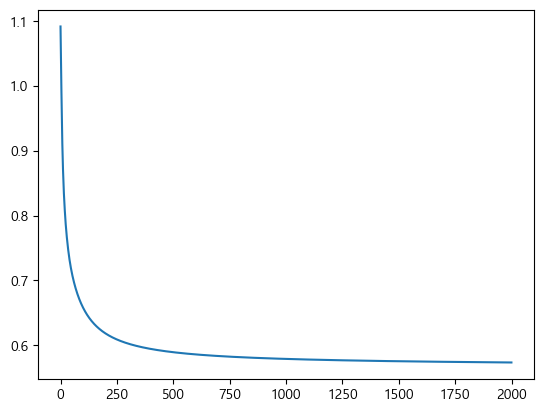

In [15]:
plt.plot(hist)
plt.show()

In [17]:
p = model.forward(x)

In [18]:
y_pred = p.argmax(dim=1).numpy()
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [19]:
y = y.argmax(dim=1).numpy()
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [21]:
con_mat = confusion_matrix(y, y_pred)

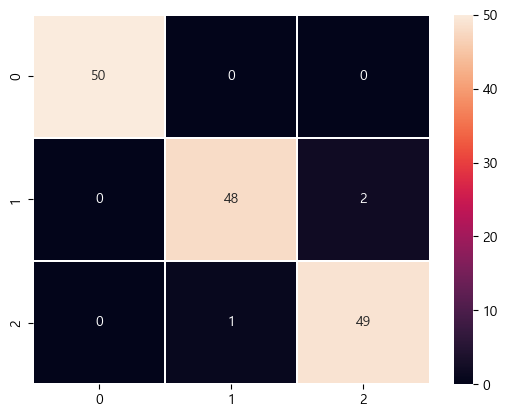

In [23]:
sb.heatmap( con_mat, annot=True, fmt='d', linewidths=0.2)
plt.show()

In [24]:
accuracy_score(y, y_pred)

0.98

In [25]:
f1_score(y, y_pred, average='macro')

0.97999799979998